**Topic Modelling**


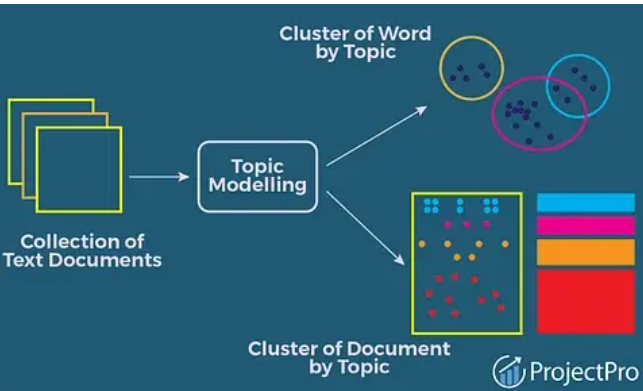

BERTopic is a frame work used in topic modelling. It has following steps:

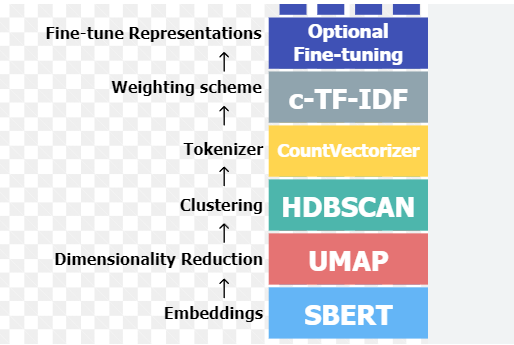

**Topic Modelling on Amazon food reviews**

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Reviews.csv' #https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df = pd.read_csv(file_path)
df.head(5)

Mounted at /content/drive


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(568454, 10)

In [4]:
sample_indices = df.sample(3).index
print(sample_indices)
df_sampled = df.loc[sample_indices]
df_sampled

Int64Index([376548, 455941, 417474], dtype='int64')


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
376548,376549,B0018KNGDY,A3PM3DPQCR6YW5,Nicole Sutton,0,0,1,1309305600,I normally Love Larabars but the jocalat was g...,I normally love Larabars. I have tried a few f...
455941,455942,B000HKFJHW,A3OZP9OESVYDCI,"C. Hopkins ""Torchwood""",0,0,5,1260748800,Brilliant in Everyway!,I have been drinking Mannheim Streamroller's C...
417474,417475,B005GYULZY,A12PN254PTSGU5,"Contrary2 ""Mary""",1,2,4,1318204800,"Interesting way to ""treat"" your dog!",I have to say this is an unusual product. It'...


In [5]:
df_sampled.apply(lambda row: print(f"Reviews #{row.Id}:\nText: {row['Text']}\n"), axis=1)

Reviews #376549:
Text: I normally love Larabars. I have tried a few favors and have loved them all but there is something really off about the Jocalat bar. They were dried out and when you tried to take a bit out of the bar it crumbed. The box said they were good until Jan 2012 but they tasted old, dried out, just plan gross. I am not sure if this a bad box or if larabar company needs to redo their bar flavor.Bad product!!!

Reviews #455942:
Text: I have been drinking Mannheim Streamroller's Cinnamon Hot Chocolate since the year it came out.  It has been a staple in my family every year since.  The first year it came out, my mum and I through a huge Christmas Party.  We made Mulling Cider and two big professional coffee containers of Cinnamon Hot Chocolate.  They went in under an hour!  That's how good it is.  I grew up on Chip Davis and Mannheim Steamroller.  I was supposed to goto American Gramophone, in Omaha, last week.  Unfortunately, a huge blizzard tore through and I was stuck i

376548    None
455941    None
417474    None
dtype: object

In [6]:
df_final=df.head(5000)

In [7]:
!pip install sentence_transformers
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=4934a28d913d8dec152eec792651b9387252f8d3b3a76fbb417b5667b789b9fa
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2

In [27]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")


In [28]:
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model=sentence_model)
topics, probs = model.fit_transform(df_final['Text'])

2024-01-25 17:31:23,902 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2024-01-25 17:34:59,396 - BERTopic - Embedding - Completed ✓
2024-01-25 17:34:59,397 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-25 17:35:06,032 - BERTopic - Dimensionality - Completed ✓
2024-01-25 17:35:06,034 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-25 17:35:06,156 - BERTopic - Cluster - Completed ✓
2024-01-25 17:35:06,163 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-25 17:35:06,577 - BERTopic - Representation - Completed ✓


In [29]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq

Number of topics: 89


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1095,-1_the_and_to_of,"[the, and, to, of, it, these, is, are, br, in]",[There is nothing too good or too bad about th...
1,0,365,0_dog_food_dogs_newman,"[dog, food, dogs, newman, he, she, her, my, an...",[I originally bought this as a replacement for...
2,1,323,1_chocolate_cocoa_hot_cup,"[chocolate, cocoa, hot, cup, cups, keurig, gro...",[This is the best hot cocoa I have tried for t...
3,2,313,2_tea_green_it_teas,"[tea, green, it, teas, drink, this, water, is,...",[I have been drinking Royal King 100% Natural ...
4,3,198,3_gluten_bisquick_free_pancakes,"[gluten, bisquick, free, pancakes, mix, biscui...",[I find the gluten-free Bisquick pancake mix t...
...,...,...,...,...,...
84,83,11,83_thai_spicy_chips_ginger,"[thai, spicy, chips, ginger, kettle, chip, the...",[Used to eat the Spicy Thai flavor all the tim...
85,84,11,84_jelly_belly_beans_plum,"[jelly, belly, beans, plum, cardboard, runts, ...",[I was shocked to see that the bulk version of...
86,85,11,85_nectar_agave_sugar_use,"[nectar, agave, sugar, use, glycemic, baking, ...",[I am on a low glycemic index diet to help con...
87,86,11,86_salt_chips_salty_sodium,"[salt, chips, salty, sodium, seem, they, these...",[These chips are tasty but not what I expected...


In [31]:
model.get_topic(1)

[('chocolate', 0.03424746093989164),
 ('cocoa', 0.03381398304033002),
 ('hot', 0.03318108761038409),
 ('cup', 0.02014447403109687),
 ('cups', 0.01647172802561806),
 ('keurig', 0.01604902939012565),
 ('grove', 0.012354170327283706),
 ('square', 0.01195564870382294),
 ('the', 0.011660862017121234),
 ('dark', 0.011104211985633824)]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(ngram_range=(1,2),stop_words="english")
model.update_topics(df_final['Text'], vectorizer_model=vectorizer_model) #finetune

In [33]:
freq1 = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq1

Number of topics: 89


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1095,-1_br_like_coffee_flavor,"[br, like, coffee, flavor, good, chips, br br,...",[There is nothing too good or too bad about th...
1,0,365,0_dog_food_dogs_dog food,"[dog, food, dogs, dog food, newman, treats, lo...",[I originally bought this as a replacement for...
2,1,323,1_chocolate_cocoa_hot_hot chocolate,"[chocolate, cocoa, hot, hot chocolate, hot coc...",[This is the best hot cocoa I have tried for t...
3,2,313,2_tea_green_green tea_teas,"[tea, green, green tea, teas, drink, water, br...",[I have been drinking Royal King 100% Natural ...
4,3,198,3_gluten_gluten free_bisquick_free,"[gluten, gluten free, bisquick, free, pancakes...",[I find the gluten-free Bisquick pancake mix t...
...,...,...,...,...,...
84,83,11,83_thai_spicy_spicy thai_chips,"[thai, spicy, spicy thai, chips, thai chips, g...",[Used to eat the Spicy Thai flavor all the tim...
85,84,11,84_jelly_jelly belly_belly_jelly beans,"[jelly, jelly belly, belly, jelly beans, beans...",[I was shocked to see that the bulk version of...
86,85,11,85_nectar_agave_agave nectar_sugar,"[nectar, agave, agave nectar, sugar, low glyce...",[I am on a low glycemic index diet to help con...
87,86,11,86_salt_chips_salty_low salt,"[salt, chips, salty, low salt, sodium, salt ch...",[These chips are tasty but not what I expected...


In [37]:
model.get_topic(2)

[('tea', 0.057636837391907565),
 ('green', 0.018262736977507646),
 ('green tea', 0.01786971862241875),
 ('teas', 0.012029011659831917),
 ('drink', 0.011001254774245012),
 ('water', 0.010213820709428275),
 ('br', 0.008926318022090499),
 ('iced', 0.008114891700838251),
 ('drinking', 0.007592161970256916),
 ('br br', 0.007208724125828881)]

In [36]:
model.visualize_hierarchy()

In [24]:
freq1.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1197,-1_br_like_good_flavor,"[br, like, good, flavor, product, just, br br,...",[This practically falls under the category of ...
1,0,313,0_chocolate_hot_cocoa_hot chocolate,"[chocolate, hot, cocoa, hot chocolate, hot coc...",[These Grove Square Hot Cocoa flavors are by f...
2,1,291,1_dog_food_dog food_dogs,"[dog, food, dog food, dogs, newman, organic, o...",[This is the best dog food I have ever purchas...
3,2,170,2_tea_teas_black tea_drink,"[tea, teas, black tea, drink, rose, black, lik...",[I've been drinking this tea for the past 8 or...
4,3,151,3_chips_bag_chip_great,"[chips, bag, chip, great, tortilla, good, love...","[I wasn't sure about these chips, but thought ..."
5,4,121,4_cookies_oreo_cookie_chocolate,"[cookies, oreo, cookie, chocolate, oreos, nabi...",[We are still six years away from the centenni...
6,5,108,5_baby_organic_son_formula,"[baby, organic, son, formula, earth best, eart...",[Both our twins love this one right from the s...
7,6,85,6_mic_icicle_usb_blue,"[mic, icicle, usb, blue, windows, plug, sound,...",[I bought the Blue Icicle because I had to qui...
8,7,80,7_kettle_chips_kettle brand_kettle chips,"[kettle, chips, kettle brand, kettle chips, po...","[I'm addicted to salty and tangy flavors, so w..."
9,8,78,8_coconut_pineapple_coconut water_water,"[coconut, pineapple, coconut water, water, dri...",[This drink is perfect for the summer. It is a...
